$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Unsupervised Learning



<br/>
<br/><br/><br/>

### ITCS 4156

### Minwoo "Jake" Lee

# Goal

The goal of this activity is to implement the k-means clustering algorithm that we learned in class. We'll practice with the previously used Iris classification data, [Iris](https://archive.ics.uci.edu/ml/datasets/iris). Follow the TODO titles and comments to finish the activity! 

# Agenda

* Loading Iris data from Scikit-Learn
* Visualize Iris data
* k-means
    * Visualize Results
    * PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Loading Iris data from Scikit-Learn

Just like previously in the semester, let's load the Iris data via Scikit. The `load_iris()` function will load our Iris data and metadata. Here we only want to extract the data and targets using `iris.data` and `iris.target`.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
T = iris.target
print("X (data) shape: {}".format(X.shape))
print("T (labels) shape: {}".format(X.shape))

X (data) shape: (150, 4)
T (labels) shape: (150, 4)


# Visualize Iris data

Here we provide a quick visualization we used prior in the semester. You should be able to  observe the three flower clusters for each of the feature graphs. Recall that the Iris data has 4 features 'Sepal length', 'Sepal width', 'Petal length', and 'Petal width'

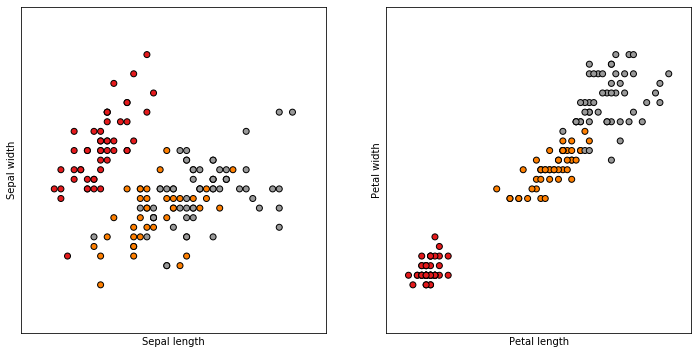

In [7]:
#http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# modified by JML

plt.figure(figsize=(12,6))
for i in range(2):
    x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
    y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

    plt.subplot(1,2,i+1)
    # Plot the training points
    plt.scatter(X[:, 2*i], X[:, 2*i+1], c=T, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length' if i==0 else 'Petal length')
    plt.ylabel('Sepal width'  if i==0 else 'Petal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())


# k-means

As we learned in class, k-means algorithm learns to find the center of each cluster and its corresponding members iteratively. The algorithm can be summarized as:


1. we first choose an initial $\muv_k$ (means/centers) randomly,

2. minimize $E$ (error) w.r.t. the $\delta_{ik}$ (labels).

3. Now, fixing the $\delta_{ik}$, update $\muv_k$ that minimizes $E$. 

4. Repeating 2 and 3, we obtain the $K$ clusters after convergence. 

# META: Review TODOs here please

### TODO:

Fill in the TODOs in the following code to finish `k-means()` function. 

1. Select initial centers by randomly selecting $K$ **data indexes** from our data `X`. Use `np.random.choice()` function to select `K` indexes from our `N` total data samples. Store the output into `cidx`.
    1. Hint: Remember we are **selecting indexes not samples** from our data and that we want to randomly choose **indexes without replacement**. If you don't know what `np.random.choice()` does or what parameters it takes, please read the docs [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html)!
    
#### Find clusters that minimizes the error $E$ using the current centers.
Please refer to the "Debug Shapes" output below if you are confused by any of the variables in this section and the shapes they are taking on. This debug statement will be output anytime you run the `kmeans()` function.

> ------------------------Debug Shapes------------------------ <br>
> centers shape (K, F): (2, 4) <br>
> braodcast_centers shape (K, 1, F): (2, 1, 4) <br>
> sqr_diff shape (K, N, F): (2, 150, 4) <br>
> distance_err shape (K, N)
: (2, 150) <br>
> classess shape (N,): (150,) <br>
> ------------------------------------------------------------ <br>

2. Compute the squared difference between our data `X` and a broadcastable version of our centers variable called `broadcast_centers`. Store the output into `sqr_diff`.
    1. Here we want to compute the squared difference between our data `X` and the corresponding feature means `centers`. In order to do so, we need to add a new axis to our `centers` variable, which allows NumPy to broadcast to match the the number of samples in `X`. We do this for you and store the output into a variable called `broadcast_centers`.
    
3. Sum over our the squared differences `sqr_diff` along the feature axis. Store the output into `distance_err`.
    1.  Recall that we added a dimension to `centers` creating `broadcast_centers`. This means our `sqr_diff` shape will have 3 dimensions $(K, N, F)$ where $K$ is the number of clusters, $N$ is the number of data samples (this dimension was braodcasted previously), and $F$ is the number of features. We want to sum over the feature dimension $F$. Think about which axis corresponds to the feature dimension $F$ if we have three dimensions $(0, 1, 2)$.
 
4. Update the cluster centers based on the feature means for our $K$ clusters. Follow the given pseudo code below to implement this todo. The below code could be implemented differently or even in one line. If you know how to do that, feel free to do so.

    1. ```
        for k from 0 to K:
            k_samples = get all the data samples whose labels equal k
            k_means = compute the means for k_samples
            centers[k, :] = update current cluster with k_means  
        ``` 


In [4]:
def kmeans(X, K=2, maxiter=100):
    """
        Args:
            X (np.ndarray): Data formatted as a NumPy array.
            
            K (int): Number of clusters
            
            maxiter (int): Max iteration for minmizing error
            
    """
    N = X.shape[0] # Number of samples
    
    # TODO(1): Select initial centers by randomly selecting K data indexes from our data X
    cidx = 
    centers = X[cidx, :]
    classes = np.zeros(N)
    
    E = []  # error log
    
    # repeat until convergence or up to maxiter
    for step in range(maxiter):

        # Allows NumPy to broadcast our centers to match the shape of X
        broadcast_centers = centers[:,np.newaxis,:]


        # TODO (2)
        sqr_diff = 
        # TODO (3)
        distance_err = 
        
        # Get the classes/cluster label for each smaple by taking the class
        # with the smallest error or distance.
        classes = np.argmin(distance_err, axis=0)
        
        # Record the all min errors for each sample 
        # (min is equivalent to indicator variable here).
        min_err = np.min(distance_err, axis=0)
        # Sum all min errors to get total error.
        error = np.sum(min_err)
        
        # Convergence check
        if len(E) > 0 and np.abs(error - E[-1]) < np.finfo(float).eps:
            print("Converged at {}".format(step))
            break
        
        # TODO(4):

        
        # Add summed min error to error tracked
        E.append(error)

        # Print statements for debugging
        if step == 0:
            print("{:-^60s}".format("Debug Shapes"))
            print("centers shape (K, F): {}".format(centers.shape))
            print("braodcast_centers shape (K, 1, F): {}".format(broadcast_centers.shape))
            print("sqr_diff shape (K, N, F): {}".format(sqr_diff.shape))
            print("distance_err shape (K, N): {}".format(distance_err.shape))
            print("classess shape (N,): {}".format(classes.shape))
            print("-"*60)
            
    return centers, classes, E

### TODO: 

1. Run the `kmeans()` function on the Iris data `X` using only 2 clusters. Remember we do **NOT** use the labels for training as it is **unsupervised** learning! Store the output into `mus`, `ys`, and `errs`.

In [5]:
# TODO (1)
mus, ys, errs = 

------------------------Debug Shapes------------------------
centers shape (K, F): (2, 4)
braodcast_centers shape (K, 1, F): (2, 1, 4)
sqr_diff shape (K, N, F): (2, 150, 4)
distance_err shape (K, N): (2, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 6


## Visualize Results

Let's plot the error and observe the curve. As we can see, k-means converges way before our  default `maxiter` value of 100.

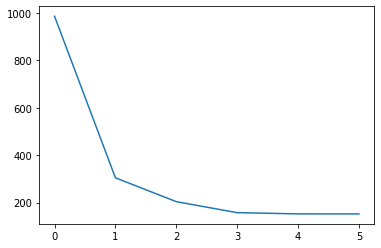

In [6]:
plt.plot(errs)

The below output visualizes the predicted labels for our data.

In [7]:
ys

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

We can also visualize the feature means for each cluster, as given below. We can think about the means as x-y coordinates if we pair like features. For example, the 'sepal length' mean could be the x-value and the 'sepal width' mean could be the y-value. Likewise, the 'petal length' mean could be the x-value and the 'petal width' mean could be the y-value. This idea will be useful when plotting the centers of the clusters later on!

In [8]:
human_mus  = pd.DataFrame(mus, columns=iris.feature_names)
human_mus.index = ['cluster {} means'.format(k+1) for k in range(len(human_mus))]
human_mus

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster 1 means,5.005660,3.369811,1.560377,0.290566
cluster 2 means,6.301031,2.886598,4.958763,1.695876


In [9]:
def plot_iris_cluster(X, y, mu, dim=2):
    """
        Plot the Itis data with based on passed labels
        
        Args:
            X (np.ndarray): Data formatted as a NumPy array
            y (np.ndarray): Vector of labels to plot each cluster.
            m (float): The center of each cluster
            dim (int): option to plot multidimensional figures (for sepal and petal)
    """

    k = mu.shape[0]
    plt.figure(figsize=(12,6))
    for i in range(dim):
        x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
        y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

        plt.subplot(1,2,i+1)
        # Plot the training points
        plt.scatter(X[:, 2*i], X[:, 2*i+1], c=y, cmap=plt.cm.Set1,
                    edgecolor='k')
        
        # plot the center
        plt.scatter(mu[:, 2*i], mu[:, 2*i+1], c=range(k), marker='s', 
                    cmap=plt.cm.bwr, edgecolor='y')
        
        plt.xlabel('Sepal length' if i==0 else 'Petal length')
        plt.ylabel('Sepal width'  if i==0 else 'Petal width')

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

Below we plot the predicted clusters. Recall above that we talked about pairing the learned means to get x-y coordinates. If you look closely you can see these pairings or centers of the clusters represented by colored squares.

How do you think the k-means clustering algorithm preformed?

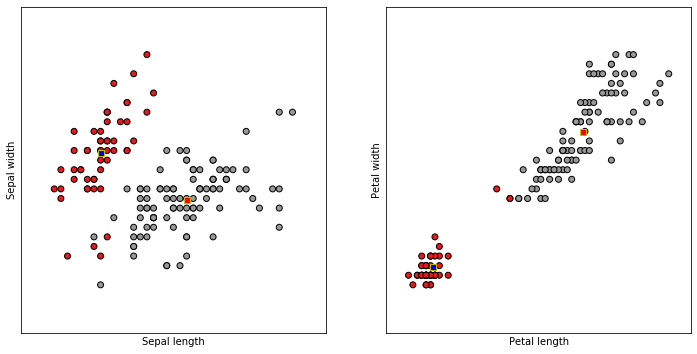

In [10]:
plot_iris_cluster(X, ys, mus)

### TODO: 

Let's try using different amounts of clusters now and then observe what happens to our plots.


1. Run `kmeans()`now with **5** clusters. Store the output into `mus`, `ys`, and `errs`.

2. Run `kmeans()`now with **3** clusters. Store the output into `mus`, `ys`, and `errs`.

------------------------Debug Shapes------------------------
centers shape (K, F): (5, 4)
braodcast_centers shape (K, 1, F): (5, 1, 4)
sqr_diff shape (K, N, F): (5, 150, 4)
distance_err shape (K, N): (5, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 5


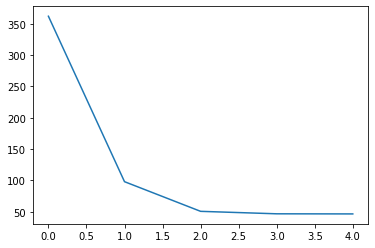

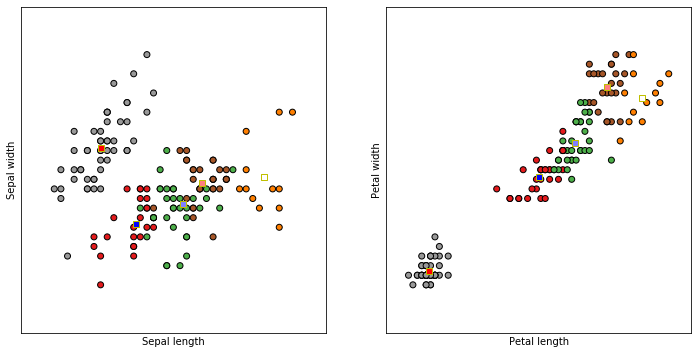

In [11]:
# TODO (1): Run kmeans() now with five clusters.
mus, ys, errs = 

plt.plot(errs)
plot_iris_cluster(X, ys, mus)

------------------------Debug Shapes------------------------
centers shape (K, F): (3, 4)
braodcast_centers shape (K, 1, F): (3, 1, 4)
sqr_diff shape (K, N, F): (3, 150, 4)
distance_err shape (K, N): (3, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 12


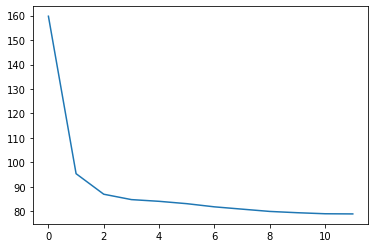

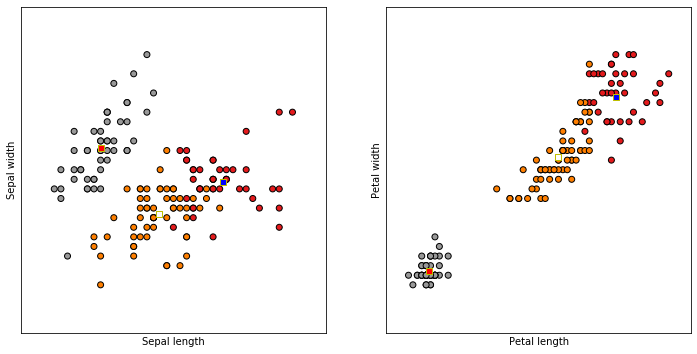

In [12]:
# TODO (2): Run kmeans() now with three clusters. 
mus, ys, errs = 

plt.plot(errs)
plot_iris_cluster(X, ys, mus)

### TODO 
As we know the number of classes in the data is three, let's see how our original labels and predicted labels from using 3 clusters match up. 


1. Plot our true labeled data by using the `plot_iris_cluster()` function. Instead of using the predicted clustered labels `ys` use our true labels `T`. 
    1. Hint: You must also pass the learned centers `mus` and our data `X`  

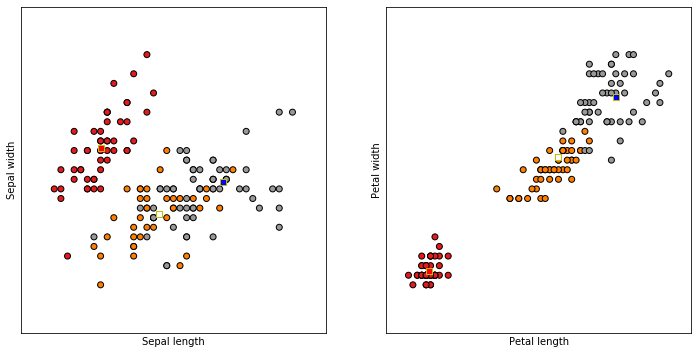

In [13]:
# TODO (1)


Take second to observe where the centers of each of the three clusters are? Are they close to their true label clusterings?

Below we compute the actual accuracy and further visualize our mislabeled data. **Note, the algorithm may actually learn a good clustering method but will assign labels to clusters differently compared to our original labels.** You can see when this happens by noticing that a cluster is learned, yet colored differently in the above plots.

In [18]:
acc = np.sum(ys==T)/X.shape[0]
print("k-means accuracy: {:.5f}".format(acc))

k-means accuracy: 0.31333


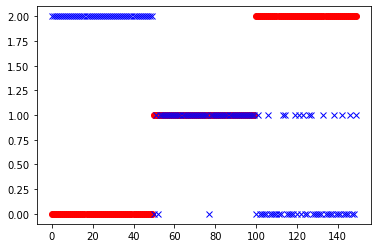

In [19]:
plt.plot(T, 'ro')
plt.plot(ys, 'bx');

## PCA

Pairing our features to form x-y coordinates and the then plotting with two figures makes sense in this case, but not typically. To get around this issue we can reduce the dimensions or features of our data to only consist of the most important dimensions.

Let's practice reducing dimensionality from 4 dimensions to 2 dimensions so we can have a single 2D plot and only 2 features to consider while clustering. 

### TODO:

To reduce dimensionality we will use the classical method of PCA. Complete the `pca()` function below.

1. Compute the mean for each feature in our data `X` using the `np.mean()` function. Store the output into `means`.
    1. Hint: We want to compute the mean for each feature so our output shape is (4,). Be sure to specify the axis that corresponds to applying the mean column-wise on our data. Recall [this](https://vrzkj25a871bpq7t1ugcgmn9-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/numpy-arrays-have-axes.png) image that details which axis values correspond to row and column-wise operations.

2. Center our data's mean around zero by computing the difference between our data `X` and our newly computed means variable `means`. Store output into `Xc`.

3. Compute the SVD of our difference array `Xc` using `np.linalg.svd()`. Store the output into `U`, `S`, `V`.

In [20]:
def pca(X):
    """ principal component analysis
    
        parameter
        ---------
        X        ndarray (N x D)
                 input data
                 
        return
        ------
        @U       ndarray (N x D)
                 left singular vectors
        @S       ndarray (D x D)
                 diagonal matrix with square root of eigenvalues
        @V       ndarray (D x D)
                 right singular vectors
        @mu      ndarray (D,)
                 1d vector of column means 
    """
    # TODO (1)
    means = 
    # TODO (2)
    Xc =
    # TODO (3)
    U, S, V = 
    
    return U, S, V.T, means

In [21]:
Xs = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
U, L, V, m = pca(Xs)

In [22]:
U

array([[-1.08239531e-01, -4.09957970e-02,  2.72186462e-02, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-9.94577561e-02,  5.75731483e-02,  5.00034005e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.12996303e-01,  2.92000319e-02, -9.42089147e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.27030413e-02, -2.29793601e-02, -3.84023516e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 6.56112167e-02, -8.63643414e-02, -1.98939364e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 4.59137323e-02,  2.07800179e-03, -1.12588405e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [23]:
L

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [24]:
V

array([[ 0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [-0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [25]:
m

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

If we look at our eigenvalues stored in `L` we can see which features are "explaining" the most about our data. In other words, if we look at the highest value eigenvalues we can see which feature is providing us with the most information. In our case, the first 2 dimensions or features are doing this!

So, let's take the first 2 features of our data, sepal width and length.

In [26]:
Xr = X[:, :2]

### TODO:
Now, let's use our reduced data `Xr` when clustering our data.

1. Run `kmeans()` passing our newly reduced data `Xr`. In addition, let's create 3 clusters, since we have 3 classes.

------------------------Debug Shapes------------------------
centers shape (K, F): (3, 2)
braodcast_centers shape (K, 1, F): (3, 1, 2)
sqr_diff shape (K, N, F): (3, 150, 2)
distance_err shape (K, N): (3, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 12


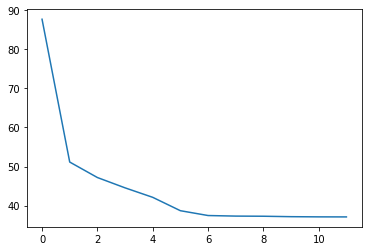

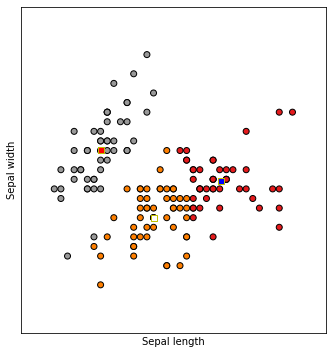

In [27]:
# TODO 1
mus, ys, errs = 

plt.plot(errs)
plot_iris_cluster(Xr, ys, mus, dim=1)

Lastly, let's see how well our predictions did.

Below we have, once again, plotted the true labels and clusters of our data.

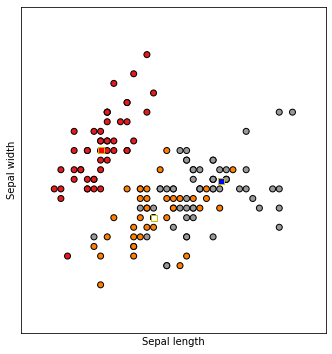

In [28]:
plot_iris_cluster(Xr, T, mus, dim=1)

Here we compute the actual accuracy and further visualize our mislabeled data again. **Note, the algorithm may actually learn a good clustering method but will assign labels to clusters differently compared to our original labels.** You can see when this happens by noticing that a cluster is learned, yet colored differently in the above plots.


See any improvement? You might have to rerun `kmeans()` function a few times before a "good" clustering method is learned.

In [29]:
acc = np.sum(ys==T)/X.shape[0]
print("k-means accuracy: {:.5f}".format(acc))

k-means accuracy: 0.26000


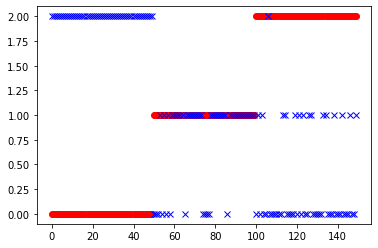

In [30]:
plt.plot(T, 'ro')
plt.plot(ys, 'bx');